In [14]:
from Precode2 import *
import numpy
data = np.load('AllSamples.npy')
import matplotlib.pyplot as plt

In [16]:
%matplotlib inline

In [17]:
k1,i_point1,k2,i_point2 = initial_S2('6737') # please replace 0111 with your last four digit of your ID

Strategy 2: k and initial points


In [18]:
print(k1)
print(i_point1)
print(k2)
print(i_point2)

4
[ 3.52782703  5.73858063]
6
[ 6.40483149  5.60578084]


In [19]:
def k_means(k, i_point, data):
    # Initial center
    length = len(data)
    centeriods = {}
    n = 0
    delta = float("inf")
    obj_old = float("inf")

#     while (len(centeriods) < k):
#         num = np.random.randint(length)
#         if num not in centeriods:
#             x1, x2 = data[num]
#             centeriods[n] = [x1, x2]
#             n += 1

    centeriods[0] = i_point
    
    measure = {}
    select = 0
    for i in range(1, k):
        value = 0
        for j in range(length):
            check = True
            for t in centeriods:
                if centeriods[t][0] == data[j][0] and centeriods[t][1] == data[j][1]:
                    check = False
            
            if check == True:
                measure[j] = np.average([np.linalg.norm(data[j] - centeriods[p]) for p in centeriods])
                if measure[j] >= value:
                    value = measure[j]
                    select = j

        centeriods[i] = data[select]
#         print(select)
    print(centeriods)
    
    while (delta != 0):
        # grouping
        dist = {}
        match = {}
        for i in range(length):
            score = float("inf")
            for j in centeriods:
                dist[i, j] = np.linalg.norm(data[i] - centeriods[j])
                if dist[i, j] <= score:
                    score = dist[i, j]
                    match[i] = j
        
        obj_new = sum(dist[i, match[i]] for i in match)
        print(obj_new)
        delta = obj_old - obj_new
        print(delta)
        obj_old = obj_new
        loss = sum(dist[i, match[i]]**2 for i in match)

        group = {}
        for i in centeriods:
            group[i] = []
        
        
        for temp in match:
            group[match[temp]].append(temp)
#         print(group)
        cluster = {}
        for i in centeriods:
            cluster[i] = []

        for temp in group:
            for i in group[temp]:
                cluster[temp].append(data[i])

        # new center
        centeriods = {}
        for i in cluster:
            centeriods[i] = np.average(cluster[i], axis=0)
#         print(centeriods)

    return centeriods, loss

In [20]:
centeriods, loss = k_means(k1, i_point1, data)
print(centeriods, loss)

{0: array([ 3.52782703,  5.73858063]), 1: array([ 9.26998864,  9.62492869]), 2: array([ 3.85212146, -1.08715226]), 3: array([ 2.95297924,  9.65073899])}
768.124960464
inf
569.686606286
198.438354178
529.588939633
40.0976666537
517.826552265
11.7623873679
501.080338038
16.7462142269
475.942456322
25.1378817157
456.122133731
19.8203225911
452.569992255
3.55214147633
451.844940952
0.725051302465
451.664489593
0.180451359508
451.45658767
0.207901922743
451.070031259
0.386556411169
449.777166666
1.29286459243
449.685623707
0.0915429589032
449.454286309
0.231337398588
449.454286309
0.0
{0: array([ 3.33995748,  2.59215224]), 1: array([ 6.60345839,  7.57042104]), 2: array([ 7.38076264,  2.33245532]), 3: array([ 2.85859235,  6.93136525])} 788.269349007


In [ ]:
# for analysis

In [21]:
def k_means_analysis(k, data):
    # Initial center
    length = len(data)
    centeriods = {}
    n = 0
    delta = float("inf")
    obj_old = float("inf")
    selected = []

#     # for kmeans without given initial
#     while (len(centeriods) < k):
#         num = np.random.randint(length)
#         if num not in selected:
#             x1, x2 = data[num]
#             centeriods[n] = [x1, x2]
#             n += 1
#             selected.append(num)

    # for kmeansPlus
    centeriods[0] = data[np.random.randint(length)]
    
    measure = {}
    select = 0
    for i in range(1, k):
        value = 0
        for j in range(length):
            check = True
            for t in centeriods:
                if centeriods[t][0] == data[j][0] and centeriods[t][1] == data[j][1]:
                    check = False
            
            if check == True:
                measure[j] = np.average([np.linalg.norm(data[j] - centeriods[p]) for p in centeriods])
                if measure[j] >= value:
                    value = measure[j]
                    select = j

        centeriods[i] = data[select]
#         print(select)
#     print(centeriods)

    
    while (delta != 0):
        # grouping
        dist = {}
        match = {}
        for i in range(length):
            score = float("inf")
            for j in centeriods:
                dist[i, j] = np.linalg.norm(data[i] - centeriods[j])
                if dist[i, j] <= score:
                    score = dist[i, j]
                    match[i] = j
        
        obj_new = sum(dist[i, match[i]] for i in match)
#         print(obj_new)
        delta = obj_old - obj_new
#         print(delta)
        obj_old = obj_new
        loss = sum(dist[i, match[i]]**2 for i in match)

        group = {}
        for i in centeriods:
            group[i] = []
        
        
        for temp in match:
            group[match[temp]].append(temp)
#         print(group)
        cluster = {}
        for i in centeriods:
            cluster[i] = []

        for temp in group:
            for i in group[temp]:
                cluster[temp].append(data[i])

        # new center
        centeriods = {}
        for i in cluster:
            centeriods[i] = np.average(cluster[i], axis=0)
    print(loss)

    return centeriods, loss

In [28]:
lossList = []
for k in range(2,11):
    centeriods, loss = k_means_analysis(k, data)
    lossList.append(loss)

1921.03348586
1293.77745239
792.724460873
716.304746771
462.926355825
399.680018559
289.932726045
277.391433977
182.78850958


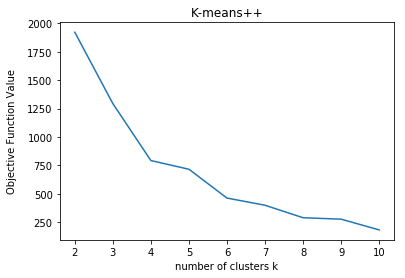

In [29]:
plt.plot(range(2,11), lossList)
plt.xlabel("number of clusters k")
plt.ylabel("Objective Function Value", labelpad=10)
plt.title('K-means++')
plt.show()